In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* There are no missing values

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

* The dataset is imbalanced

In [7]:
data['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

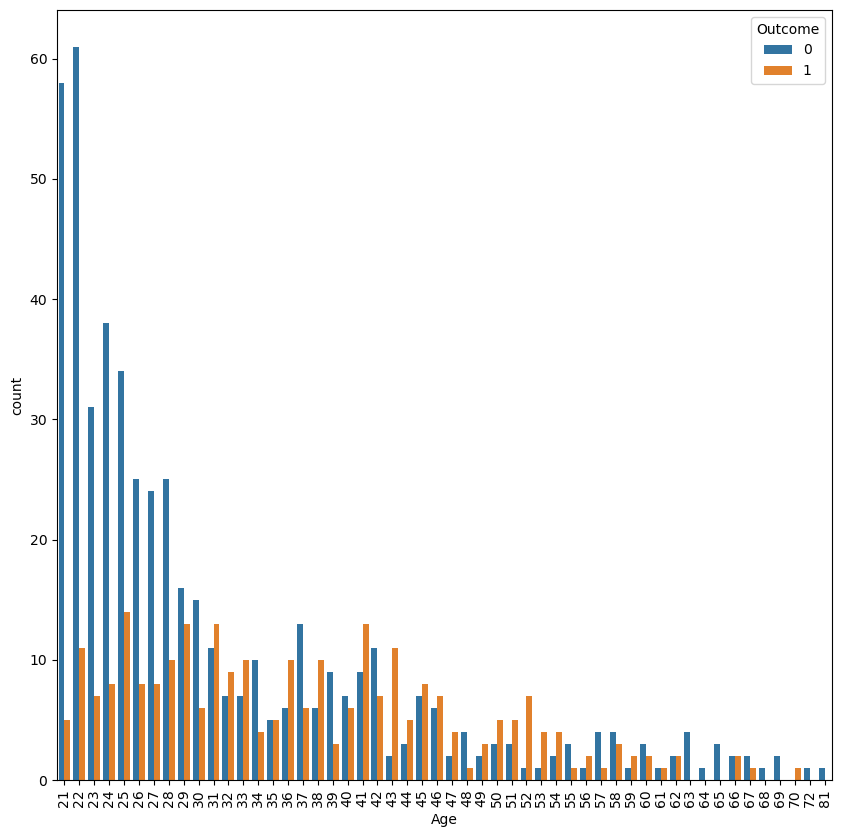

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(x='Age',data=data,hue='Outcome',)
plt.xticks(rotation=90)
plt.show()

* With increasing age the cahnce of having diabetes is also incresig

In [9]:
data[data['DiabetesPedigreeFunction'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<AxesSubplot: xlabel='Age', ylabel='DiabetesPedigreeFunction'>

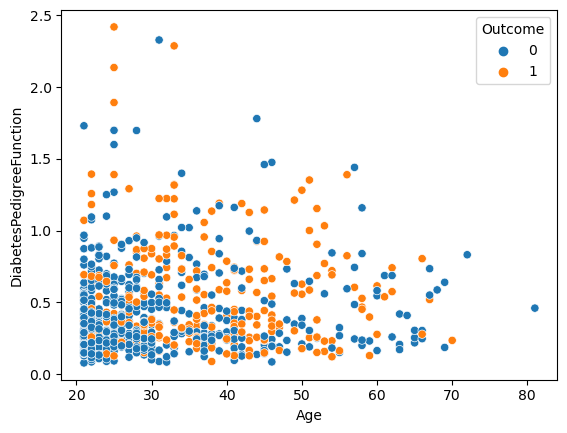

In [10]:
sns.scatterplot(x='Age',y='DiabetesPedigreeFunction',data=data,hue='Outcome')

In [11]:
data[data['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


* BMI (Body Mass Index can't be zero)

* >> A BMI below 18.5 is considered underweight.
* >> A BMI between 18.5 and 24.9 is considered normal weight.
* >> A BMI between 25 and 29.9 is considered overweight.
* >> A BMI of 30 or higher is considered obese.

In [12]:
data[data['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


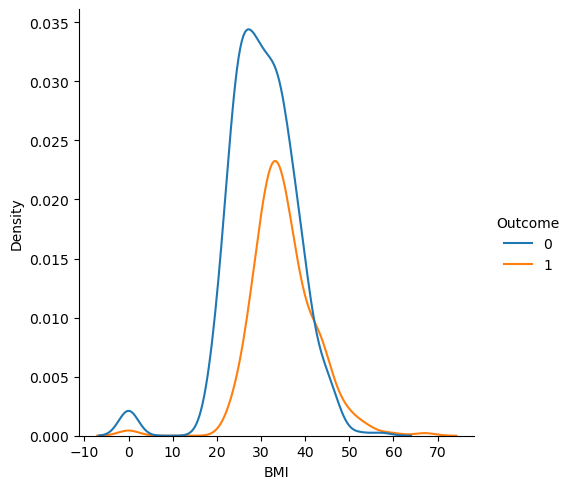

In [13]:
sns.displot(data= data, x = 'BMI',kind= 'kde',hue='Outcome')

* Having diabetes in norammly related to BMI
* The BMI between 30-40 has more chance of haing diabetes.

In [14]:
data.groupby('Outcome')['BMI'].mean()

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64

In [15]:
data['BMI'][[9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706]] = [35.142537,30.304200,30.304200,30.304200,30.304200,30.304200,30.304200,30.304200,30.304200,30.304200,35.142537]

In [16]:
data['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [17]:
data.groupby('Outcome')['Insulin'].mean()

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64

<AxesSubplot: xlabel='Insulin', ylabel='Glucose'>

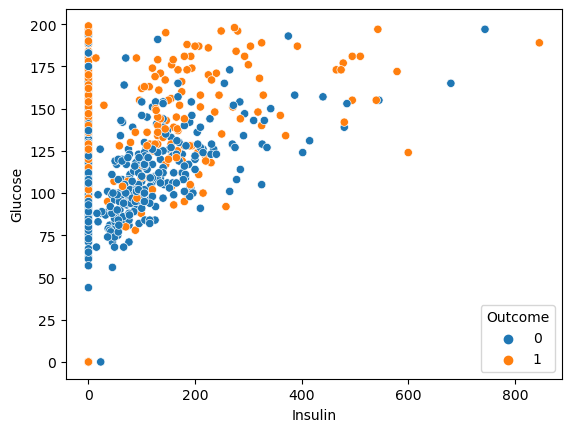

In [18]:
sns.scatterplot(data=data,x='Insulin',y='Glucose',hue='Outcome')

<AxesSubplot: >

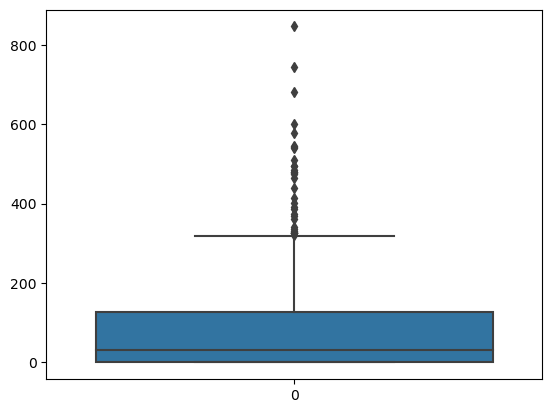

In [19]:
sns.boxplot(data.Insulin)

In [20]:
data.groupby('Outcome')['Insulin'].median()

Outcome
0    39.0
1     0.0
Name: Insulin, dtype: float64

* Peoples with high glucose and less insuling are more towards to have diabetes

In [21]:
data[data['Insulin'] == 0].shape

(374, 9)

In [22]:
data[data['Insulin'] == 0]['Outcome'].value_counts()

0    236
1    138
Name: Outcome, dtype: int64

In [23]:
data[data['Insulin'] != 0]['Outcome'].value_counts()

0    264
1    130
Name: Outcome, dtype: int64

<AxesSubplot: xlabel='Outcome', ylabel='Insulin'>

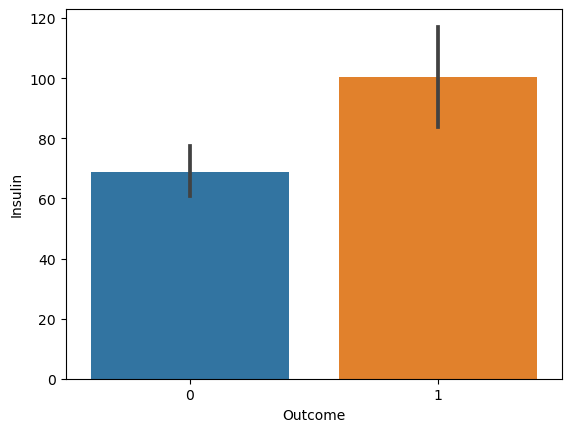

In [24]:
sns.barplot(data=data,x='Outcome',y='Insulin')

In [25]:
df1 = data[data['Insulin'] != 0]

<AxesSubplot: >

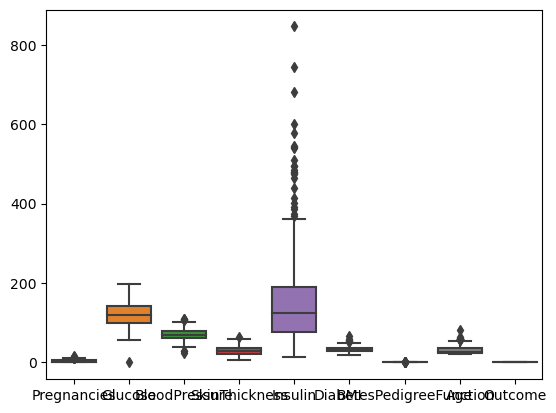

In [26]:
sns.boxplot(df1)

* For those whose insulin level is given, the outlier are large in number therefore we will evalue meadian.

In [27]:
df1[df1['Outcome'] == 0]['Insulin'].median(),df1[df1['Outcome'] == 1]['Insulin'].median()

(102.5, 169.5)

<AxesSubplot: xlabel='Insulin', ylabel='Count'>

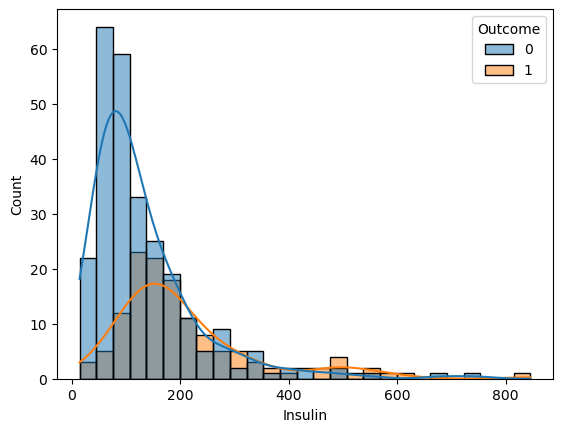

In [28]:
sns.histplot(data=data,x=data[data['Insulin'] != 0]['Insulin'],hue='Outcome',kde=True)

In [29]:
data[data['Insulin'] == 0].index

Int64Index([  0,   1,   2,   5,   7,   9,  10,  11,  12,  15,
            ...
            754, 756, 757, 758, 759, 761, 762, 764, 766, 767],
           dtype='int64', length=374)

In [30]:
Updated_Insulin = []
for i in data['Insulin'].index:
    if data['Insulin'][i] != 0:
        Updated_Insulin.append(data['Insulin'][i])
    elif data['Insulin'][i] == 0:
        if data['Outcome'][i] == 0:
            Updated_Insulin.append('102.5')
        elif data['Outcome'][i] == 1:
            Updated_Insulin.append('169.5')
        
        

In [31]:
data['Insulin'] = Updated_Insulin

In [32]:
data[data['Insulin'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [33]:
data['Insulin'] = data['Insulin'].astype(float)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [35]:
data['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [36]:
data[data['SkinThickness'] == 0].shape

(227, 9)

* Skinthickness can't be 0

In [37]:
data[data['SkinThickness'] == 0]['Outcome'].value_counts()

0    139
1     88
Name: Outcome, dtype: int64

In [38]:
data[data['SkinThickness'] != 0]['Outcome'].value_counts()

0    361
1    180
Name: Outcome, dtype: int64

<AxesSubplot: xlabel='BMI', ylabel='SkinThickness'>

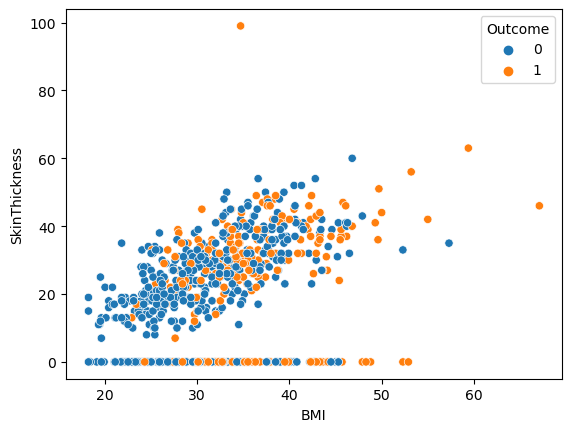

In [39]:
sns.scatterplot(data=data,x='BMI',y='SkinThickness',hue='Outcome')

In [40]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,0.058767,0.024268,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.473001,0.220431,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.058327,0.189441,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.175004,0.382721,0.183928,-0.113970,0.074752
Insulin,0.058767,0.473001,0.058327,0.175004,1.000000,0.238385,0.146878,0.123629,0.377081
BMI,0.024268,0.220431,0.189441,0.382721,0.238385,1.000000,0.152558,0.027929,0.315760
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.146878,0.152558,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,0.123629,0.027929,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.377081,0.315760,0.173844,0.238356,1.000000


* With certain incresase or decrease in BMI there is increse or decrese in SkinThickness respectively

In [41]:
df2 = data[data['SkinThickness'] != 0]

<AxesSubplot: >

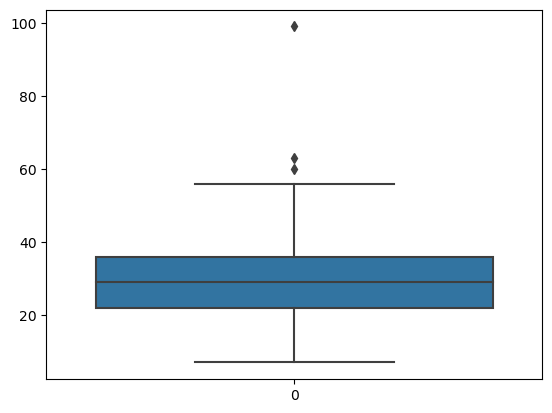

In [42]:
sns.boxplot(df2.SkinThickness)

In [43]:
df2.groupby('Outcome')['SkinThickness'].median()

Outcome
0    27.0
1    32.0
Name: SkinThickness, dtype: float64

In [44]:
Updated_SkinThcikness = []
for i in data['SkinThickness'].index:
    if data['SkinThickness'][i] != 0:
        Updated_SkinThcikness.append(data['SkinThickness'][i])
    elif data['SkinThickness'][i] == 0:
        if data['Outcome'][i] == 0:
            Updated_SkinThcikness.append(27)
        elif data['Outcome'][i] == 1:
            Updated_SkinThcikness.append(32)

In [45]:
data['SkinThickness'] = Updated_SkinThcikness

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [47]:
data[data['SkinThickness'] == 0].shape

(0, 9)

In [48]:
data['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [49]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.089028,0.058767,0.024268,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.214977,0.473001,0.220431,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.122710,0.058327,0.189441,0.041265,0.239528,0.065068
SkinThickness,0.089028,0.214977,0.122710,1.000000,0.200129,0.566078,0.106280,0.129537,0.295138
Insulin,0.058767,0.473001,0.058327,0.200129,1.000000,0.238385,0.146878,0.123629,0.377081
BMI,0.024268,0.220431,0.189441,0.566078,0.238385,1.000000,0.152558,0.027929,0.315760
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.106280,0.146878,0.152558,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.129537,0.123629,0.027929,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.295138,0.377081,0.315760,0.173844,0.238356,1.000000


In [50]:
data[data['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,27,102.5,35.300000,0.134,29,0
15,7,100,0,32,169.5,30.000000,0.484,32,1
49,7,105,0,27,102.5,30.304200,0.305,24,0
60,2,84,0,27,102.5,30.304200,0.304,21,0
78,0,131,0,32,169.5,43.200000,0.270,26,1
81,2,74,0,27,102.5,30.304200,0.102,22,0
172,2,87,0,23,102.5,28.900000,0.773,25,0
193,11,135,0,32,169.5,52.300000,0.578,40,1
222,7,119,0,27,102.5,25.200000,0.209,37,0
261,3,141,0,32,169.5,30.000000,0.761,27,1


In [51]:
df3 = data[data['BloodPressure']!=0]

In [52]:
df3.median()

Pregnancies                   3.00
Glucose                     117.00
BloodPressure                72.00
SkinThickness                28.00
Insulin                     102.50
BMI                          32.30
DiabetesPedigreeFunction      0.38
Age                          29.00
Outcome                       0.00
dtype: float64

In [53]:
df3['Outcome'].value_counts()

0    481
1    252
Name: Outcome, dtype: int64

In [54]:
Updated_BloodPressure = []
for i in data['BloodPressure'].index:
    if data['BloodPressure'][i] != 0:
        Updated_BloodPressure.append(data['BloodPressure'][i])
    elif data['BloodPressure'][i] == 0:
        Updated_BloodPressure.append(72)

In [55]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.089028,0.058767,0.024268,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.214977,0.473001,0.220431,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.122710,0.058327,0.189441,0.041265,0.239528,0.065068
SkinThickness,0.089028,0.214977,0.122710,1.000000,0.200129,0.566078,0.106280,0.129537,0.295138
Insulin,0.058767,0.473001,0.058327,0.200129,1.000000,0.238385,0.146878,0.123629,0.377081
BMI,0.024268,0.220431,0.189441,0.566078,0.238385,1.000000,0.152558,0.027929,0.315760
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.106280,0.146878,0.152558,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.129537,0.123629,0.027929,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.295138,0.377081,0.315760,0.173844,0.238356,1.000000


In [56]:
data['BloodPressure'] = Updated_BloodPressure

In [57]:
data[data['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [59]:
data[data['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,102.5,24.7,0.140,22,0
182,1,0,74,20,23.0,27.7,0.299,21,0
342,1,0,68,35,102.5,32.0,0.389,22,0
349,5,0,80,32,169.5,41.0,0.346,37,1
502,6,0,68,41,169.5,39.0,0.727,41,1


In [60]:
data[data['Glucose'] != 0]['Outcome'].value_counts()

0    497
1    266
Name: Outcome, dtype: int64

In [61]:
data.reset_index(drop=True,inplace=True)

In [62]:
df = data.copy() 

In [63]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,169.5,33.6,0.627,50,1
1,1,85,66,29,102.5,26.6,0.351,31,0
2,8,183,64,32,169.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,102.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,32,169.5,30.1,0.349,47,1


In [64]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot: >

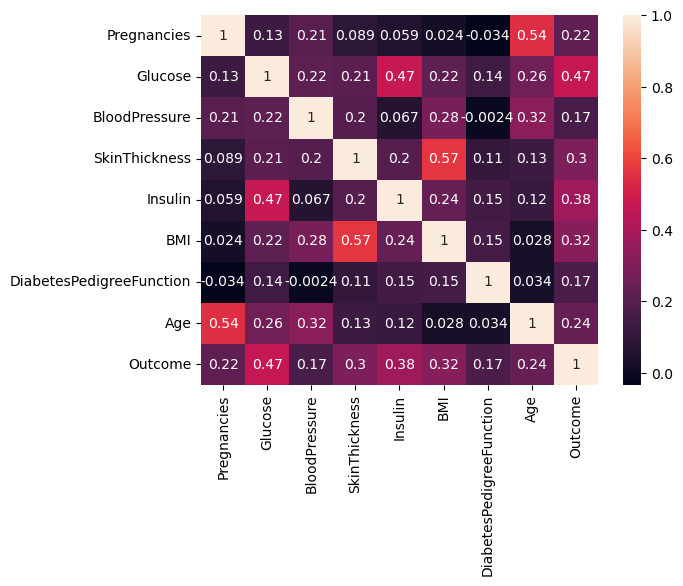

In [68]:
sns.heatmap(df.corr(),annot=True)

In [65]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df['Outcome']

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [117]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [118]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [119]:
Y_test_Pred = classifier.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test,Y_test_Pred)
acc_score

0.8188976377952756

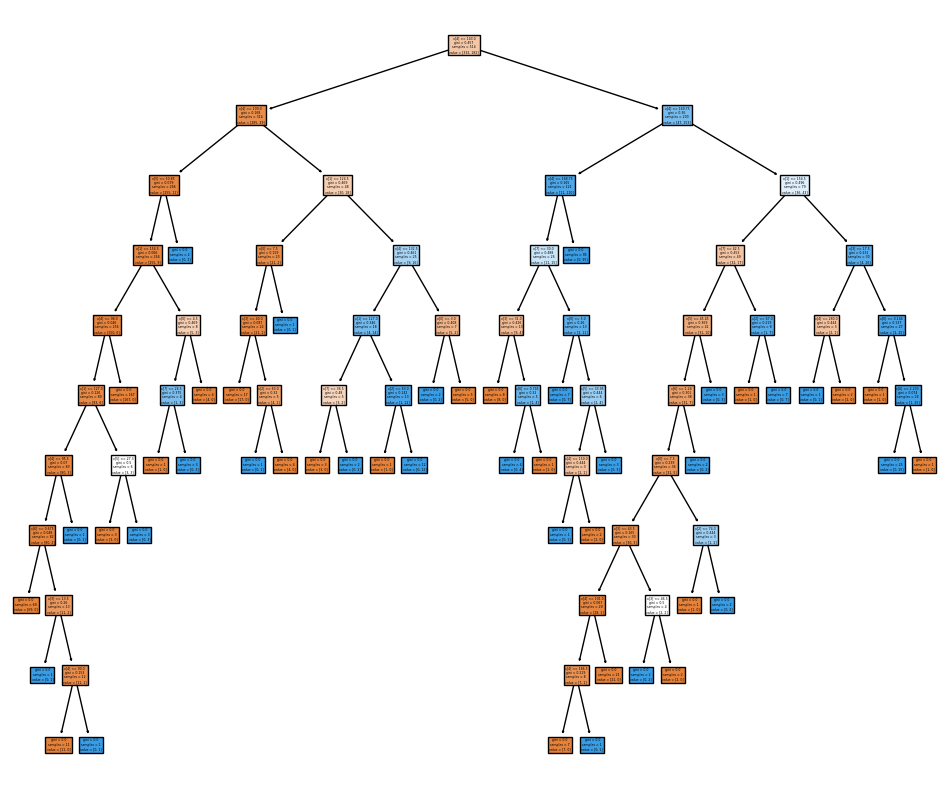

In [121]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)
plt.show()

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_test_Pred)
cm

array([[141,  27],
       [ 19,  67]])

In [123]:
from sklearn.metrics import precision_score
ps = precision_score(Y_test,Y_test_Pred)
ps

0.7127659574468085

In [124]:
from sklearn.metrics import recall_score
rs = recall_score(Y_test,Y_test_Pred)
rs

0.7790697674418605

In [125]:
paramerters = {
              'criterion' : ['gini','entropy','log_loss'],
              'splitter'  : ['best','random'],
              'max_depth' : [6,7,8,9,10,11],
              'max_features' :['auto','sqrt','log2']
}

In [126]:
from sklearn.model_selection import GridSearchCV
classifier_1 = DecisionTreeClassifier()
hyper_tun = GridSearchCV(classifier_1,param_grid=paramerters,cv=7,scoring='accuracy')
hyper_tun.fit(X_train,Y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [6, 7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [127]:
hyper_tun.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'splitter': 'best'}

In [128]:
Y_test_pred_HPT = hyper_tun.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test,Y_test_pred_HPT)
acc_score

0.8385826771653543

In [130]:
from sklearn.metrics import recall_score
rs = recall_score(Y_test,Y_test_pred_HPT)
rs

0.8023255813953488